In [145]:
import pandas as pd
import datetime as dt
import json
import matplotlib.pyplot as plt

f = open("./data/1028log.txt","r",encoding="utf-8")
item_list = f.readlines()
data_list = []
col_names = ['date','id','status','status_detail']
for data in item_list:
#     print(data)
    data = data.split(",")
#     print(data)
    
    data_json = ",".join(data[3:]).replace("\n","")
    data_list.append([int(data[0][:10]),data[1],data[2],data_json])
#     print(data_list)
f.close()

df = pd.DataFrame(data_list,columns=col_names)
df #pandasに変換できたか表示(15行)


,date,id,status,status_detail
0,1635378377,2,place_login,""""""
1,1635378534,4,user_login,""""""
2,1635378534,4,user_status_change,"{""user_id"":4,""user_status"":{""location"":1,""loca..."
3,1635378782,16,user_login,""""""
4,1635378782,16,user_status_change,"{""user_id"":16,""user_status"":{""location"":0,""loc..."
...,...,...,...,...
163,1635430717,0,user_status_change,"{""user_id"":0,""user_status"":{""location"":""0"",""lo..."
164,1635430719,0,user_status_change,"{""user_id"":0,""user_status"":{""location"":""0"",""lo..."
165,1635430723,0,user_status_change,"{""user_id"":0,""user_status"":{""location"":""0"",""lo..."
166,1635430738,0,user_status_change,"{""user_id"":0,""user_status"":{""location"":""0"",""lo..."


In [146]:
def set_status(row,before_category):
    if row['status']=='user_logout':
        return 0
    
    elif row['status']=='user_login':
        return 1
    
    elif row['status']=='user_status_change':
        status_json = json.loads(row['status_detail'])['user_status']
#         print(status_json["kaiwa_status"])
#         print(status_json)
        if status_json['kaiwa_status'] == 1:
            if status_json['kaiwa_mute'] == 1 and status_json['kaiwa_video_off'] == 1:
                return 2
            elif status_json['kaiwa_mute'] == 0 and status_json['kaiwa_video_off'] == 1:
                return 3
            elif status_json['kaiwa_mute'] == 1 and status_json['kaiwa_video_off'] == 0:
                return 4
            elif status_json['kaiwa_mute'] == 0 and status_json['kaiwa_video_off'] == 0:
                return 5
            else:
                return before_category
        else:
            return before_category
    else:
        return before_category

In [149]:
df

,date,id,status,status_detail,category
0,1635378377,2,place_login,"""""",-1.0
1,1635378534,4,user_login,"""""",NaN
2,1635378534,4,user_status_change,"{""user_id"":4,""user_status"":{""location"":1,""loca...",NaN
3,1635378782,16,user_login,"""""",NaN
4,1635378782,16,user_status_change,"{""user_id"":16,""user_status"":{""location"":0,""loc...",NaN
...,...,...,...,...,...
163,1635430717,0,user_status_change,"{""user_id"":0,""user_status"":{""location"":""0"",""lo...",NaN
164,1635430719,0,user_status_change,"{""user_id"":0,""user_status"":{""location"":""0"",""lo...",NaN
165,1635430723,0,user_status_change,"{""user_id"":0,""user_status"":{""location"":""0"",""lo...",NaN
166,1635430738,0,user_status_change,"{""user_id"":0,""user_status"":{""location"":""0"",""lo...",NaN


In [151]:
# 前のステータス設定
before_row = df.iloc[0]#ilocは1行分取ってくる
before_row['category']= -1

for index,row in df.iterrows():
#     print(index)
#     print(row)
    df.at[index,'category'] = set_status(row,before_row['category'])
    df.at[index,'datetime'] = dt.datetime.fromtimestamp(row['date']).strftime("%m/%d %H:%M:%S")
    if(before_row['date'] + 1) < row['date']:
        before_date_list = []
        
        for d in list(range(before_row['date']+1,row['date'])):
            date_time = dt.datetime.fromtimestamp(d).strftime("%m/%d %H:%M:%S")
            before_date_list.append(pd.Series([d,"","","",before_row['category'],date_time],index = df.columns))
            
        df = df.append(before_date_list)
        df = df.reset_index(drop=True)
    before_row = df.iloc[index]
df


<ipython-input-151-3cbc7ad6d21e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_row['category']= -1


,date,id,status,status_detail,category,datetime
0,1635378377,2,place_login,"""""",-1.0,10/28 08:46:17
1,1635378534,4,user_login,"""""",1.0,10/28 08:48:54
2,1635378534,4,user_status_change,"{""user_id"":4,""user_status"":{""location"":1,""loca...",1.0,10/28 08:48:54
3,1635378782,16,user_login,"""""",1.0,10/28 08:53:02
4,1635378782,16,user_status_change,"{""user_id"":16,""user_status"":{""location"":0,""loc...",1.0,10/28 08:53:02
...,...,...,...,...,...,...
53053,1635431410,,,,4.0,10/28 23:30:10
53054,1635431411,,,,4.0,10/28 23:30:11
53055,1635431412,,,,4.0,10/28 23:30:12
53056,1635431413,,,,4.0,10/28 23:30:13


In [152]:
df = df.sort_values(['date'])

# unixtimeからdatetimeに変換
# for index in df.index:
# #     print(df.loc[index,'date'] )
#     df.loc[index,'date'] = dt.datetime.fromtimestamp(df.loc[index,'date']).strftime("%m/%d %H:%M:%S")

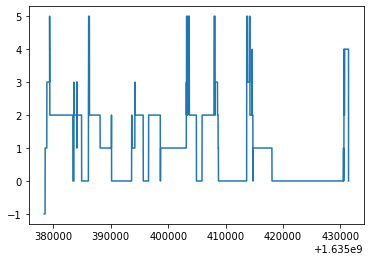

In [156]:
plt.plot(df['date'],df['category'])
plt.show()

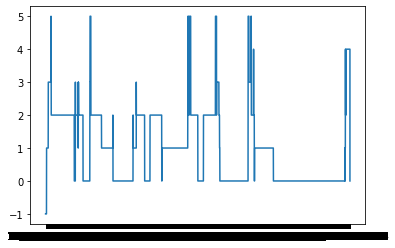

In [157]:
plt.plot(df['datetime'],df['category'])
plt.show()